AmExpert Decipher 2019 (by American Express)- The goal is to predict average credit card spend of customers

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df_train = pd.read_csv('/content/drive/My Drive/AMEXPERT_HER/Data/train.csv').fillna(0)
print(df_train.shape)
print(df_train.head())

(32820, 44)
      id account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  23334  saving       M      63   305          7695.00      0.00          
1  20329  current      M      33   326          52702.00     988.72        
2  17679  current      M      44   264          10800.49     3215.52       
3  16428  saving       M      44   233          20936.00     0.00          
4  18721  saving       F      35   324          1183.83      0.00          

   cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  \
0  479.00       0.0          622.0        0.00         2.0            
1  29873.00     0.0          1087.0       2806.24      11.0           
2  21659.64     1607.0       1168.0       355.00       6.0            
3  2094.00      0.0          11778.5      0.00         9.0            
4  3656.29      0.0          945.0        0.00         2.0            

   cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  \
0  1.0           3.0         

In [6]:
df_train.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,2402.736589,1.441190e+04,2658.235295,9031.179889,1638.468578,8.492474,9.205027,11.702864,2.205271,2.956399,4.168190,121520.416819,0.083547,0.025777,0.087843,0.049512,3.525947e+04,1.257661e+04,1.613573e+03,61.514099,6.599695e+04,6.782475e+04,14.089854,3.588665,4.179570e+04,6.239209e+04,7.133583e+04,3.829433,13.055484,4.454095e+04,7.240706e+04,7.226999e+04,5.499208,15.256459,4.263998e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,7993.217056,2.363688e+04,10052.661575,15720.847307,6477.366589,10.659069,9.638781,11.728113,4.751877,5.956464,7.758457,123019.422355,0.276711,0.158472,0.283070,0.216939,9.355132e+05,1.259663e+05,1.870329e+04,873.147187,1.602291e+05,1.700623e+05,11.762698,3.493640,1.129092e+05,1.797292e+05,1.934144e+05,3.854704,11.593995,1.228037e+05,3.039465e+05,2.994231e+05,4.751899,13.483520,1.190238e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,0.000000,1.030000e+02,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-12179.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,0.000000,2.983298e+03,0.000000,1637.875000,0.000000,2.000000,3.000000,4.000000,0.000000,0.000000,0.000000,45000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.896597e+04,2.001075e+04,5.000000,1.000000,1.474375e+04,1.636635e+04,1.813375e+04,1.000000,5.000000,1.357863e+04,2.100124e+04,2.032375e+04,3.000000,6.000000,1.463425e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,0.000000,7.332298e+03,0.000000,4147.487500,0.000000,6.000000,7.000000,9.000000,0.000000,0.000000,1.000000,75000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.851662e+04,3.924050e+04,12.000000,3.000000,2.530000e+04,3.510626e+04,4.001250e+04,3.000000,10.000000,2.651200e+04,4.226600e+04,4.052765e+04,4.000000,12.000000,2.550000e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,1582.500000,1.684785e+04,1888.250000,10126.250000,857.000000,12.000000,13.000000,16.000000,2.000000,3.000000,5.000000,145000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.207154e+04,7.347238e+04,20.000000,5.000000,4.470000e+04,6.946070e+04,8.123050e+04,5.000000,18.000000,4.900000e+04,7.978210e+04,7.769936e+04,7.000000,21.000000,4.506050e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,301991.94

In [7]:
# Dataset dimensions
print(df_train.shape)
print("*"*57)
print("Column Data types:")
print(df_train.dtypes)

(32820, 44)
*********************************************************
Column Data types:
id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr   

In [8]:
# Value counts
print(df_train["account_type"].value_counts())
print(df_train["gender"].value_counts())
print(df_train["loan_enq"].value_counts())

current    25825
saving      6995
Name: account_type, dtype: int64
M    28106
F     4714
Name: gender, dtype: int64
0    32211
Y      609
Name: loan_enq, dtype: int64


In [ ]:
df_train["account_type"] = df_train["account_type"].map({"current":0, "saving":1})
df_train["gender"] = df_train["gender"].map({"M":0, "F":1})
df_train["loan_enq"] = df_train["loan_enq"].map(lambda x: 1 if x=='Y' else 0)

In [33]:
df_train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,1,0,63,305,7695.00,0.00,479.00,0.0,622.0,0.00,2.0,1.0,3.0,0.0,0.0,0.0,150000.0,0.0,0.0,0.0,0.0,0.0,118845.2,50000.0,0.0,51205.47,50259.0,3.0,1.0,50000.0,24740.22,114252.0,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0,0.00,435
1,20329,0,0,33,326,52702.00,988.72,29873.00,0.0,1087.0,2806.24,11.0,14.0,11.0,1.0,0.0,6.0,176000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159050.76,169812.0,20.0,9.0,70000.0,103102.85,174606.0,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,0,4963.33,1921
2,17679,0,0,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51484.55,38942.0,16.0,4.0,11700.0,15283.00,23051.0,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0,0.00,1970
3,16428,1,0,44,233,20936.00,0.00,2094.00,0.0,11778.5,0.00,9.0,6.0,6.0,0.0,0.0,0.0,600000.0,0.0,0.0,0.0,0.0,0.0,132442.0,0.0,0.0,1981.07,2294.0,2.0,1.0,2000.0,19361.24,19529.0,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,0,1238.18,21579
4,18721,1,1,35,324,1183.83,0.00,3656.29,0.0,945.0,0.00,2.0,7.0,9.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6462.00,10271.0,6.0,1.0,10000.0,7461.00,3194.0,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0,0.00,1814


**EDA And Feature Engineering**

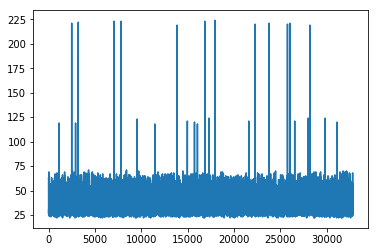

In [30]:
#1. Age
#Histogram and PDF Analysis
import matplotlib.pyplot as plt
plt.plot(df_train['age'])
plt.show()

In [33]:
df_train[df_train.age>100]

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
1121,12756,1,0,119,123,12862.350,0.00,892.01,0.00,6950.68,0.0,5.0,1.0,2.0,0.0,0.0,0.0,280000.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0,579.95,3392
2496,41928,0,0,221,723,3801.500,4369.00,5440.00,0.00,652.00,0.0,0.0,4.0,1.0,2.0,0.0,0.0,130000.0,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0,52292.11,128357.00,15.0,5.0,53957.0,122848.00,39917.00,3.0,18.0,37200.00,131641.75,122885.00,14.0,34.0,37883.00,0,0.00,3971
2914,23122,0,0,119,683,31769.000,17776.00,19290.50,11242.00,6098.00,1327.0,6.0,0.0,5.0,10.0,10.0,12.0,46000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,116530.49,104802.74,25.0,2.0,104518.0,126362.75,137074.12,3.0,23.0,136268.00,142365.39,133185.50,8.0,23.0,102332.00,0,0.00,5192
3205,35592,0,0,222,526,30425.880,27123.00,321.00,5537.14,10991.00,3454.0,15.0,1.0,2.0,5.0,6.0,13.0,75000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,75168.75,80607.00,30.0,3.0,39824.0,40280.63,38701.00,2.0,34.0,38547.00,49030.11,44167.00,3.0,33.0,41247.00,0,0.00,4430
7071,1479,1,1,223,523,21008.440,0.00,9910.25,0.00,9559.00,0.0,16.0,5.0,19.0,0.0,0.0,0.0,300000.0,0.0,0.0,0.0,0.0,296802.58,0.00,0.0,0.0,178.00,275.00,1.0,1.0,50.0,0.00,0.00,0.0,0.0,0.00,0.00,457.00,1.0,0.0,157.00,0,0.00,6059
7823,10230,0,0,223,723,2975.000,0.00,555.00,0.00,2920.00,947.0,0.0,1.0,4.0,0.0,0.0,5.0,78000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22796.05,28381.00,5.0,1.0,28367.0,39984.42,53475.00,2.0,8.0,28367.00,88835.14,68370.29,5.0,12.0,28367.00,0,0.00,250
9541,13849,0,0,123,723,4738.000,0.00,28221.00,0.00,1116.00,0.0,7.0,20.0,10.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,59261.00,59311.00,7.0,4.0,23142.0,57997.00,96545.00,2.0,7.0,72000.00,62274.00,24066.00,3.0,10.0,23658.00,0,1168.83,26936
11455,34081,1,0,118,513,220507.810,0.00,19692.50,0.00,12559.00,0.0,8.0,6.0,7.0,0.0,0.0,0.0,200000.0,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.0,584.00,848.00,4.0,3.0,375.0,283.72,9591.80,1.0,2.0,9468.80,112.00,15211.50,2.0,1.0,13702.50,0,0.00,1434
13862,18776,1,0,219,623,40445.715,0.00,3726.00,0.00,74896.43,0.0,0.0,1.0,46.0,0.0,0.0,0.0,250000.0,0.0,0.0,1.0,1.0,225823.80,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1,156.64,18241
14967,15619,0,0,121,248,42635.240,1187.03,3647.00,2744.92,2957.00,0.0,5.0,2.0,3.0,3.0,4.0,1.0,390000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,134675.90,129672.00,11.0,5.0,45000.0,99944.45,105275.00,5.0,18.0,49000.00,13625.97,394.00,1.0,4.0,327.00,0,0.00,4947


In [ ]:
df_train = df_train[df_train.age<120]

In [ ]:
df_train["Age_below_avg"]= df_train['age'].map(lambda x: 0 if x<35 else 1)

In [ ]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [ ]:
df_train['region_code_count']=reg_df['reg_code_count']

**Test**

In [7]:
df_test = pd.read_csv('/content/drive/My Drive/AMEXPERT_HER/Data/test.csv').fillna(0)
df_test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,0.0,4551.00,0.0,6.0,2.0,6.0,1.0,0.0,0.0,75000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10806.93,25279.0,7.0,2.0,20000.0,21530.34,15416.52,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,0,0.00
1,43223,current,M,31,233,44870.36,0.0,34177.00,0.0,25889.21,0.0,13.0,19.0,36.0,0.0,0.0,0.0,116000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,642.0,3.0,5.0,2.0,8.0,3.0,3.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83205.22,105813.0,33.0,5.0,39000.0,90312.48,65227.00,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,0,2885.82
3,12368,current,M,39,878,33060.58,0.0,3797.12,0.0,291.00,0.0,16.0,12.0,15.0,0.0,0.0,0.0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45342.25,59640.0,4.0,5.0,28753.0,84699.30,63393.00,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,0,0.00
4,40415,current,M,44,404,18236.90,0.0,30513.30,0.0,20395.28,0.0,42.0,38.0,20.0,0.0,0.0,0.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25493.95,25154.0,4.0,1.0,25000.0,39813.40,45120.00,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,0,3342.58


In [ ]:
df_test["account_type"] = df_test["account_type"].map({"current":0, "saving":1})
df_test["gender"] = df_test["gender"].map({"M":0, "F":1})
df_test["loan_enq"] = df_test["loan_enq"].map(lambda x: 1 if x=='Y' else 0)

**Predict Prepare**

In [9]:
df_train_ = df_train.iloc[:,1:43]
print (df_train_.shape)
print(df_train_.head())

(32820, 42)
   account_type  gender  age  ...  max_credit_amount_jun  loan_enq  emi_active
0             1       0   63  ...                  470.0         0        0.00
1             0       0   33  ...                27000.0         0     4963.33
2             0       0   44  ...                20800.0         0        0.00
3             1       0   44  ...                 5300.0         0     1238.18
4             1       1   35  ...                45000.0         0        0.00

[5 rows x 42 columns]


In [10]:
df_test_ = df_test.iloc[:,1:]
print (df_test_.shape)
print(df_test_.head())

(14067, 42)
   account_type  gender  age  ...  max_credit_amount_jun  loan_enq  emi_active
0             1       0   36  ...                 5000.0         0        0.00
1             0       0   31  ...                    0.0         0        0.00
2             0       0   26  ...                29352.0         0     2885.82
3             0       0   39  ...                32696.0         0        0.00
4             0       0   44  ...                19000.0         0     3342.58

[5 rows x 42 columns]


In [11]:
y_train = df_train['cc_cons'].to_frame('cc_cons')
print(y_train.shape)
print (y_train.head())

(32820, 1)
   cc_cons
0      435
1     1921
2     1970
3    21579
4     1814


**Cross-validate**

In [ ]:
#CV
#Random Grid Search
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
hype_param = dict(alpha=alpha) 
model = MultinomialNB()
rsearch = RandomizedSearchCV(model,hype_param,n_iter=100,random_state=41,scoring='roc_auc')
rsearch.fit(sent_vectors_train_df_new_feat,y_train)
print(rsearch.best_params_)

**Predict**

In [ ]:
X_train = np.array(df_train_)
y_train = np.array(y_train).ravel()
X_test = np.array(df_test_)

In [13]:
#xgb_model = XGBClassifier(learning_rate=1).fit(X_train, y_train)
#xgb_model = XGBClassifier(eval_metric='auc',learning_rate=1,max_depth = 3,min_child_weight = 10,subsample=1, n_estimators=100,scale_pos_weight=2).fit(X_train, y_train)
xgb_model = XGBRegressor().fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
#print(xgb_predictions)
xgb_predictions_df = pd.DataFrame(xgb_predictions)
xgb_predictions_df.columns = ['cc_cons']

[08:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
submt_df = pd.concat([df_test['id'], xgb_predictions_df], axis = 1)

In [ ]:
xl_writer = pd.ExcelWriter('Amexpert_Her.xls', engine='xlsxwriter')
submt_df.to_excel(xl_writer, sheet_name='Sheet1', index=False, header=True)
xl_writer.close()

In [ ]:
from google.colab import files

In [ ]:

files.download('Amexpert_Her.xlsx')